## Reading the data

##### 1.Resize the image
##### 2.change the colors from RGB to LAB colors

In [1]:
# Import required libraries
import os
import pandas as pd
import numpy as np
from skimage import io, color
from skimage.transform import resize

# Define paths
base_path = "Images"

# Initialize lists
data = []
labels = []

# Define image size
image_size = (64, 64)  # Resize images to this size

# Process images with color space conversion
for label in os.listdir(base_path):  # Each folder is a class label
    folder_path = os.path.join(base_path, label)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                # Read the image
                img = io.imread(file_path)
                if img is None:
                    continue

                # Resize the image
                img = resize(img, image_size, mode='reflect', anti_aliasing=True)

                # Convert to Lab color space
                lab_img = color.rgb2lab(img)
                a_channel = lab_img[:, :, 1]  # Green-Red
                b_channel = lab_img[:, :, 2]  # Blue-Yellow

                a_channel_normalized = a_channel / 255.0
                b_channel_normalized = b_channel / 255.0

                # Combine a and b channels
                combined_lab = np.dstack((a_channel_normalized, b_channel_normalized)).flatten()

                # Append features to the data
                data.append(combined_lab)
                labels.append(label)
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

# Create a DataFrame
df = pd.DataFrame(data)
df['label'] = labels

# Save to a CSV file
df.to_csv("Dogs.csv", index=False)


## Read the csv file

In [3]:
df =pd.read_csv("Dog.csv")

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,0.000860,-0.003370,-0.003280,0.000776,0.006600,0.007139,0.022314,0.015972,0.023945,0.017268,...,8.302403e-07,-4.446681e-07,8.428685e-07,-4.569532e-07,8.661550e-07,-4.840367e-07,9.174918e-07,-4.650197e-07,8.814450e-07,n02085620-Chihuahua
1,0.172867,0.052755,0.217602,0.051658,0.252187,0.031365,0.256171,0.019340,0.236130,0.013208,...,7.633750e-02,-5.782948e-02,5.594601e-02,-6.060902e-02,8.561331e-02,-5.183498e-02,8.131519e-02,-6.068569e-02,1.024812e-01,n02085620-Chihuahua
2,-0.005551,0.005643,-0.005521,0.005612,-0.005491,0.005581,-0.004995,0.005075,-0.000977,0.000994,...,4.617815e-02,-3.677430e-02,4.637584e-02,-3.826302e-02,4.571144e-02,-4.402278e-02,4.558776e-02,-4.858882e-02,4.391833e-02,n02085620-Chihuahua
3,-0.029504,0.059642,-0.025533,0.049593,-0.021313,0.036510,-0.020570,0.041717,-0.018553,0.019204,...,5.186985e-02,-1.730722e-02,3.339922e-02,-1.691431e-02,2.762185e-02,-1.386257e-02,1.920937e-02,-1.168170e-02,1.452995e-02,n02085620-Chihuahua
4,0.054368,0.095547,0.053268,0.091938,0.051045,0.087889,0.048366,0.074864,0.048761,0.075400,...,8.008085e-02,4.658716e-02,8.230805e-02,5.133109e-02,8.453665e-02,5.600109e-02,8.589986e-02,5.557697e-02,8.746404e-02,n02085620-Chihuahua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.016341,0.010208,0.023064,0.009985,0.017758,0.010172,0.023727,0.009418,0.023459,0.008901,...,-3.909878e-02,-4.030005e-03,-4.113230e-02,-4.968596e-03,-4.106200e-02,-8.834944e-03,-4.119314e-02,-3.237645e-03,-4.230924e-02,n02086240-Shih-Tzu
948,-0.000010,0.000018,-0.000010,0.000018,-0.000010,0.000018,-0.000010,0.000018,-0.000010,0.000018,...,1.116924e-01,2.179100e-03,1.086191e-01,4.449409e-03,1.103876e-01,6.151382e-03,1.106319e-01,5.878355e-03,1.104134e-01,n02086240-Shih-Tzu
949,0.015832,0.051278,0.013697,0.056955,0.011864,0.062029,0.011671,0.061303,0.013673,0.056863,...,-1.938142e-05,1.216986e-02,-1.198915e-02,1.400477e-02,-2.328908e-02,7.108956e-03,-1.630387e-02,5.546079e-03,-1.130320e-02,n02086240-Shih-Tzu
950,-0.028483,0.028669,-0.028379,0.028554,-0.028296,0.028462,-0.028266,0.028429,-0.028222,0.028381,...,1.252891e-02,-1.307376e-02,1.259435e-02,-1.470066e-02,1.205363e-02,-1.605071e-02,1.166592e-02,-1.431161e-02,1.113870e-02,n02086240-Shih-Tzu


In [5]:
# Randomize the data order and drop the old index
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,label
0,-0.031736,0.118716,-0.022895,0.110988,-0.016771,0.099276,-0.021035,0.092035,-0.019617,0.094906,...,-0.009195,-1.279833e-01,-0.006541,-1.207155e-01,-0.011494,-1.192295e-01,-0.007613,-1.147828e-01,-7.642977e-03,n02085782-Japanese_spaniel
1,-0.025575,0.048435,-0.035413,0.072223,-0.033472,0.063590,-0.030549,0.054461,-0.022219,0.046517,...,0.076031,4.031714e-02,0.058123,4.749873e-02,0.071095,5.502062e-02,0.066172,6.703651e-02,7.466573e-02,n02085936-Maltese_dog
2,-0.002895,0.092410,-0.002860,0.092771,-0.001340,0.094594,0.004688,0.095835,0.004282,0.102671,...,0.045904,3.083659e-02,0.045805,2.931667e-02,0.045981,2.809242e-02,0.046251,2.711218e-02,4.892057e-02,n02086079-Pekinese
3,-0.000010,0.000018,-0.000010,0.000018,-0.000010,0.000018,-0.000010,0.000018,-0.000010,0.000018,...,0.000018,-9.627159e-06,0.000018,-9.627201e-06,0.000018,-9.627207e-06,0.000018,-9.627207e-06,1.824871e-05,n02086240-Shih-Tzu
4,0.009182,-0.064156,0.021523,-0.078646,0.024364,-0.056738,0.024348,-0.014046,0.023900,-0.018228,...,0.000280,-2.500136e-07,-0.000007,-6.031755e-07,0.000001,-7.953040e-07,0.000002,-4.660168e-07,8.833351e-07,n02085936-Maltese_dog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,-0.045094,0.010441,-0.037983,0.023795,0.010938,0.033710,0.075402,0.042505,0.082968,0.044590,...,0.080155,1.507705e-01,0.073999,1.459741e-01,0.083800,1.414863e-01,0.086418,1.427814e-01,7.613128e-02,n02085620-Chihuahua
948,-0.001748,-0.003052,0.030023,0.011008,0.026763,0.017781,0.044475,0.030929,0.049326,0.035919,...,0.032371,5.981314e-04,0.016451,1.407878e-03,0.011242,3.948053e-03,0.007487,-3.697300e-03,8.165454e-03,n02085782-Japanese_spaniel
949,-0.002334,0.015317,-0.011477,0.027532,0.001984,0.026017,0.020022,-0.004280,0.010747,-0.008631,...,-0.004058,2.885235e-03,-0.018173,3.081566e-04,-0.016519,1.053892e-02,-0.029622,1.677236e-03,-1.511562e-02,n02086240-Shih-Tzu
950,-0.007727,-0.038934,-0.003287,-0.040541,0.000765,-0.040670,-0.000888,-0.037810,-0.004401,-0.031393,...,0.038827,-5.909770e-03,0.024307,-3.626803e-03,0.023845,-1.794111e-02,0.038231,-1.852195e-02,3.910067e-02,n02085936-Maltese_dog


## Data preprocessing and spliting

In [8]:
X = df.drop(columns=['label'])
y=df["label"]
X.shape

(952, 8192)

In [9]:
#apply pca with 92% variance
from sklearn.decomposition import PCA
pca = PCA(n_components=0.92)
X_reduced = pca.fit_transform(X)

In [10]:
X_reduced.shape

(952, 142)

In [11]:
df_pca = pd.DataFrame(X_reduced)

# Add the labels back to the DataFrame
df_pca['label'] = y.values 
df_pca

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,label
0,-0.738792,-4.115488,0.574082,0.594531,0.774267,0.416263,-1.084831,-0.471489,0.957510,-0.153642,...,0.050291,0.050594,-0.013088,-0.270400,-0.027301,-0.101067,-0.072016,-0.068500,0.070353,n02085782-Japanese_spaniel
1,1.178985,-0.071012,0.192877,-1.157812,-0.134661,-0.741802,0.733642,0.287829,-0.922757,-0.231475,...,0.099725,0.125836,0.106219,-0.000879,0.311939,-0.253465,0.132899,-0.016852,-0.395270,n02085936-Maltese_dog
2,2.530011,3.226108,-1.247029,1.112300,-1.477961,-0.439286,-0.498602,-0.422852,-0.531401,-0.592875,...,0.015137,-0.004919,-0.010024,0.306683,0.082317,-0.147017,-0.061996,-0.079701,-0.035371,n02086079-Pekinese
3,-3.131080,-0.895615,-2.377710,-1.352260,-0.082127,0.739654,0.500874,0.174498,0.653621,-0.519614,...,-0.130005,-0.103019,-0.092734,-0.219217,0.173956,0.173769,0.023341,-0.005703,-0.032820,n02086240-Shih-Tzu
4,-1.307572,2.704794,-0.571034,0.577660,-0.270230,-0.554630,-0.003909,0.588117,-0.278101,0.282268,...,-0.266112,0.000082,-0.147346,0.055157,0.004792,0.092654,0.096155,-0.195141,0.046675,n02085936-Maltese_dog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,1.852212,5.130668,0.342658,-1.436356,0.688715,-0.901453,1.692229,0.070176,-0.515044,0.107960,...,-0.201346,0.050901,-0.279096,0.089290,0.213241,-0.025001,0.150812,0.177850,0.199003,n02085620-Chihuahua
948,-1.271463,1.685020,0.485940,-1.366871,-0.825361,-0.284908,0.665611,0.096280,-0.453206,-0.605227,...,0.381938,-0.226780,0.002033,-0.167883,-0.038586,0.121440,0.186079,0.139435,0.092827,n02085782-Japanese_spaniel
949,-1.935879,0.482525,0.400167,0.100190,-0.026266,0.226477,-0.183517,0.045360,0.043845,-0.001914,...,0.036031,0.012937,-0.063863,0.004213,0.079017,-0.029614,-0.056339,-0.082430,0.003428,n02086240-Shih-Tzu
950,-1.641459,-0.645330,-0.621522,-0.148707,0.234990,-0.109136,-0.195033,0.416676,-0.364258,0.164963,...,0.102674,0.163063,0.045781,0.044758,0.082354,0.128930,0.142727,-0.055055,0.017999,n02085936-Maltese_dog


In [12]:
from sklearn.preprocessing import LabelEncoder
classes = df_pca["label"].unique()
label_encoder = LabelEncoder()
df_pca['label'] = label_encoder.fit_transform(df_pca['label'])

df_pca

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,label
0,-0.738792,-4.115488,0.574082,0.594531,0.774267,0.416263,-1.084831,-0.471489,0.957510,-0.153642,...,0.050291,0.050594,-0.013088,-0.270400,-0.027301,-0.101067,-0.072016,-0.068500,0.070353,1
1,1.178985,-0.071012,0.192877,-1.157812,-0.134661,-0.741802,0.733642,0.287829,-0.922757,-0.231475,...,0.099725,0.125836,0.106219,-0.000879,0.311939,-0.253465,0.132899,-0.016852,-0.395270,2
2,2.530011,3.226108,-1.247029,1.112300,-1.477961,-0.439286,-0.498602,-0.422852,-0.531401,-0.592875,...,0.015137,-0.004919,-0.010024,0.306683,0.082317,-0.147017,-0.061996,-0.079701,-0.035371,3
3,-3.131080,-0.895615,-2.377710,-1.352260,-0.082127,0.739654,0.500874,0.174498,0.653621,-0.519614,...,-0.130005,-0.103019,-0.092734,-0.219217,0.173956,0.173769,0.023341,-0.005703,-0.032820,4
4,-1.307572,2.704794,-0.571034,0.577660,-0.270230,-0.554630,-0.003909,0.588117,-0.278101,0.282268,...,-0.266112,0.000082,-0.147346,0.055157,0.004792,0.092654,0.096155,-0.195141,0.046675,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,1.852212,5.130668,0.342658,-1.436356,0.688715,-0.901453,1.692229,0.070176,-0.515044,0.107960,...,-0.201346,0.050901,-0.279096,0.089290,0.213241,-0.025001,0.150812,0.177850,0.199003,0
948,-1.271463,1.685020,0.485940,-1.366871,-0.825361,-0.284908,0.665611,0.096280,-0.453206,-0.605227,...,0.381938,-0.226780,0.002033,-0.167883,-0.038586,0.121440,0.186079,0.139435,0.092827,1
949,-1.935879,0.482525,0.400167,0.100190,-0.026266,0.226477,-0.183517,0.045360,0.043845,-0.001914,...,0.036031,0.012937,-0.063863,0.004213,0.079017,-0.029614,-0.056339,-0.082430,0.003428,4
950,-1.641459,-0.645330,-0.621522,-0.148707,0.234990,-0.109136,-0.195033,0.416676,-0.364258,0.164963,...,0.102674,0.163063,0.045781,0.044758,0.082354,0.128930,0.142727,-0.055055,0.017999,2


In [13]:
#Save the final dataframe to use it directly if needed later
df_pca.to_csv("Dogs_pca.csv")

In [14]:
from sklearn.model_selection import train_test_split
X = df_pca.drop(columns=["label"])
y = df_pca["label"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
316,-2.690257,-0.414785,-0.224304,-0.251503,-0.085377,-0.674055,0.055619,-0.067403,-0.030484,-0.027831,...,0.039096,-0.041286,0.004405,0.012371,0.066889,-0.034259,0.016161,0.053933,-0.016271,-0.032053
695,-2.356574,1.711575,2.687884,-0.097207,1.723970,2.279127,1.199468,-0.950058,-1.338356,-0.484081,...,-0.058965,-0.073163,0.055636,0.147966,0.016273,-0.354839,-0.004463,-0.164335,-0.102094,-0.025000
212,1.307772,-3.022024,1.302830,-0.113346,-1.615982,0.373783,0.088455,-0.048998,0.026723,0.056172,...,0.006785,-0.027328,0.112069,-0.016744,0.048526,0.001557,0.057098,-0.061610,0.003361,-0.108052
79,-2.246772,-0.105031,1.262509,-0.260719,-1.155472,0.320447,0.859472,0.045557,0.200003,-0.166373,...,-0.036324,0.171682,-0.016626,0.178171,0.075842,0.059918,0.072355,-0.171533,-0.109511,0.024518
148,-1.377535,-3.389716,1.514142,-1.111287,-0.347439,0.388762,-0.842576,-1.221580,-0.067356,-0.263356,...,-0.092939,0.163873,0.016814,0.005996,-0.026175,-0.070230,-0.194371,0.002095,-0.083798,-0.041557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.870130,0.187750,-0.710857,-0.262200,-0.299980,0.216375,0.314676,-0.325143,-0.172094,0.135515,...,0.029075,-0.042526,0.074231,-0.010452,-0.089147,-0.015193,0.064289,0.031208,0.062667,-0.003181
270,0.662235,-4.764785,0.607672,-0.711189,-0.479356,0.082444,-0.839028,-0.763990,-0.365805,0.349502,...,-0.147162,0.085305,-0.136337,0.017064,-0.169506,-0.048862,-0.067392,-0.206673,0.026485,0.033462
860,-0.209721,0.233581,-0.179098,0.515834,0.202000,0.514072,0.029951,-0.091334,-0.498397,0.365919,...,-0.049453,-0.059412,0.022228,0.047351,-0.052802,0.055440,0.051990,0.006735,0.017677,0.048677
435,-0.913620,0.420329,0.320728,0.158144,0.632705,-0.578782,0.279402,-0.418768,-0.122095,-0.276468,...,-0.115459,-0.004851,0.084839,0.003318,-0.089925,-0.226008,-0.049517,-0.026482,0.020270,0.134727


## Modeling

### Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1]
              , "solver" : ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
               "penalty": ["l1" ,"l2"]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

grid.best_estimator_

E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise Val

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

### KNN Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,algorithm="brute")
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

## Models Evaluation

### Accuracy

In [23]:
from sklearn.metrics import accuracy_score

y_train_pred_lr = grid.best_estimator_.predict(X_train)
y_test_pred_lr = grid.best_estimator_.predict(X_test)

print(f"train accuracy: {accuracy_score(y_train,y_train_pred_lr)*100}\ntest accuracy: {accuracy_score(y_test,y_test_pred_lr)*100}")

train accuracy: 34.68468468468468
test accuracy: 28.671328671328673


In [24]:
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

print(f"train accuracy: {accuracy_score(y_train,y_train_pred_knn)*100}\ntest accuracy: {accuracy_score(y_test,y_test_pred_knn)*100}")

train accuracy: 51.35135135135135
test accuracy: 34.96503496503497


### Confusion Matrix

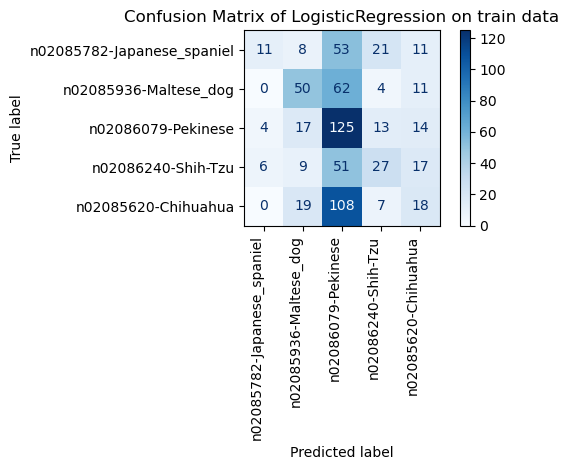

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_train_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of LogisticRegression on train data")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

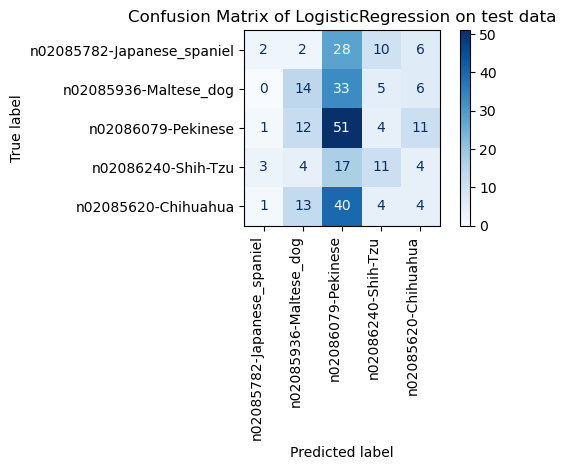

In [27]:
cm = confusion_matrix(y_test, y_test_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of LogisticRegression on test data")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

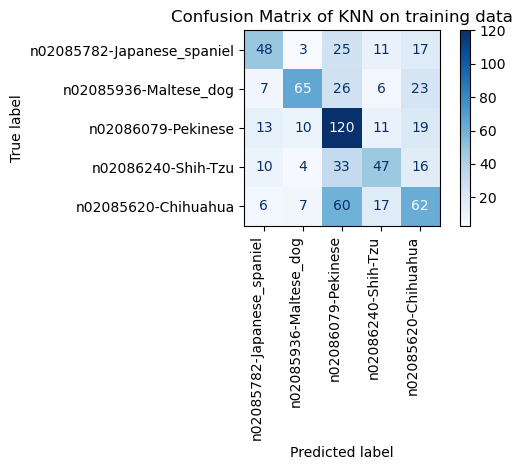

In [28]:
cm = confusion_matrix(y_train, y_train_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of KNN on training data")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

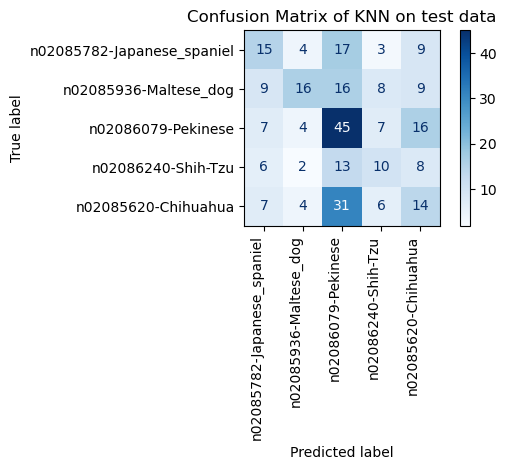

In [29]:
# Create confusion matrix for the test data of the KNN
cm = confusion_matrix(y_test, y_test_pred_knn)

# Plot the confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of KNN on test data")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### AUC

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_train_pred_lr_prob = grid.best_estimator_.predict_proba(X_train)
y_test_pred_lr_prob = grid.best_estimator_.predict_proba(X_test)

roc_auc_score_lr_train = roc_auc_score(y_train, y_train_pred_lr_prob,multi_class="ovr")
roc_auc_score_lr_test = roc_auc_score(y_test, y_test_pred_lr_prob,multi_class="ovr")

print(f"ROC_AUC_Score LR train: {roc_auc_score_lr_train}\nROC_AUC_Score LR test: {roc_auc_score_lr_test}")

ROC_AUC_Score LR train: 0.673467485560964
ROC_AUC_Score LR test: 0.606422385822403


In [32]:
y_train_pred_knn_prob = knn.predict_proba(X_train)
y_test_pred_knn_prob = knn.predict_proba(X_test)

roc_auc_score_knn_train = roc_auc_score(y_train, y_train_pred_knn_prob,multi_class="ovr")
roc_auc_score_knn_test = roc_auc_score(y_test, y_test_pred_knn_prob,multi_class="ovr")

print(f"ROC_AUC_Score KNN train: {roc_auc_score_knn_train}\nROC_AUC_Score KNN test: {roc_auc_score_knn_test}")

ROC_AUC_Score KNN train: 0.8425272808463472
ROC_AUC_Score KNN test: 0.6060248879107233


### Precison recall

In [34]:
from sklearn.metrics import precision_score, recall_score

def pr_score(y_train,y_test,y_train_pred,y_test_pred,model_name):
    precision_train_lr = precision_score(y_train, y_train_pred, average='macro')
    recall_train_lr = recall_score(y_train, y_train_pred, average='macro')
    precision_test_lr = precision_score(y_test, y_test_pred, average='macro')
    recall_test_lr = recall_score(y_test, y_test_pred, average='macro')
    print(f"{model_name} Train Precision (Macro): {precision_train_lr*100}")
    print(f"{model_name} Test Precision (Macro): {precision_test_lr*100}")
    print(f"{model_name} Train Recall (Macro): {recall_train_lr*100}")
    print(f"{model_name} Test Recall (Macro): {recall_test_lr*100}")

pr_score(y_train,y_test,y_train_pred_lr,y_test_pred_lr,'Logistic Regression')

Logistic Regression Train Precision (Macro): 39.02101503588041
Logistic Regression Test Precision (Macro): 27.02324429167226
Logistic Regression Train Recall (Macro): 31.71777937716172
Logistic Regression Test Recall (Macro): 25.503660166963975


In [35]:
pr_score(y_train,y_test,y_train_pred_knn,y_test_pred_knn,'KNN')

KNN Train Precision (Macro): 54.39470828737301
KNN Test Precision (Macro): 35.74425060635283
KNN Train Recall (Macro): 50.043171355449026
KNN Test Recall (Macro): 32.80398060306467


In [36]:
from sklearn.metrics import classification_report

In [37]:
def class_rep(y,y_pred,model_name):
    rep = classification_report(y, y_pred)
    print(f'{model_name}\n Report {rep}')

In [38]:
class_rep(y_train,y_train_pred_lr,'LogisticRegression')

LogisticRegression
 Report               precision    recall  f1-score   support

           0       0.52      0.11      0.18       104
           1       0.49      0.39      0.43       127
           2       0.31      0.72      0.44       173
           3       0.38      0.25      0.30       110
           4       0.25      0.12      0.16       152

    accuracy                           0.35       666
   macro avg       0.39      0.32      0.30       666
weighted avg       0.38      0.35      0.31       666



class_rep(y_test,y_test_pred_lr,'LogisticRegression')

In [40]:
class_rep(y_train,y_train_pred_knn,'KnnClassification')

KnnClassification
 Report               precision    recall  f1-score   support

           0       0.57      0.46      0.51       104
           1       0.73      0.51      0.60       127
           2       0.45      0.69      0.55       173
           3       0.51      0.43      0.47       110
           4       0.45      0.41      0.43       152

    accuracy                           0.51       666
   macro avg       0.54      0.50      0.51       666
weighted avg       0.53      0.51      0.51       666



In [41]:
class_rep(y_test,y_test_pred_knn,'KnnClassification')

KnnClassification
 Report               precision    recall  f1-score   support

           0       0.34      0.31      0.33        48
           1       0.53      0.28      0.36        58
           2       0.37      0.57      0.45        79
           3       0.29      0.26      0.27        39
           4       0.25      0.23      0.24        62

    accuracy                           0.35       286
   macro avg       0.36      0.33      0.33       286
weighted avg       0.36      0.35      0.34       286



### ROC Graph

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels (e.g., one-hot encode)
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))  # Ensure correct unique classes
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Ensure correct unique classes

n_classes = y_test_bin.shape[1]

C:\Users\mazen\AppData\Local\Temp\ipykernel_17048\512150867.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)  # Colormap for distinct colors


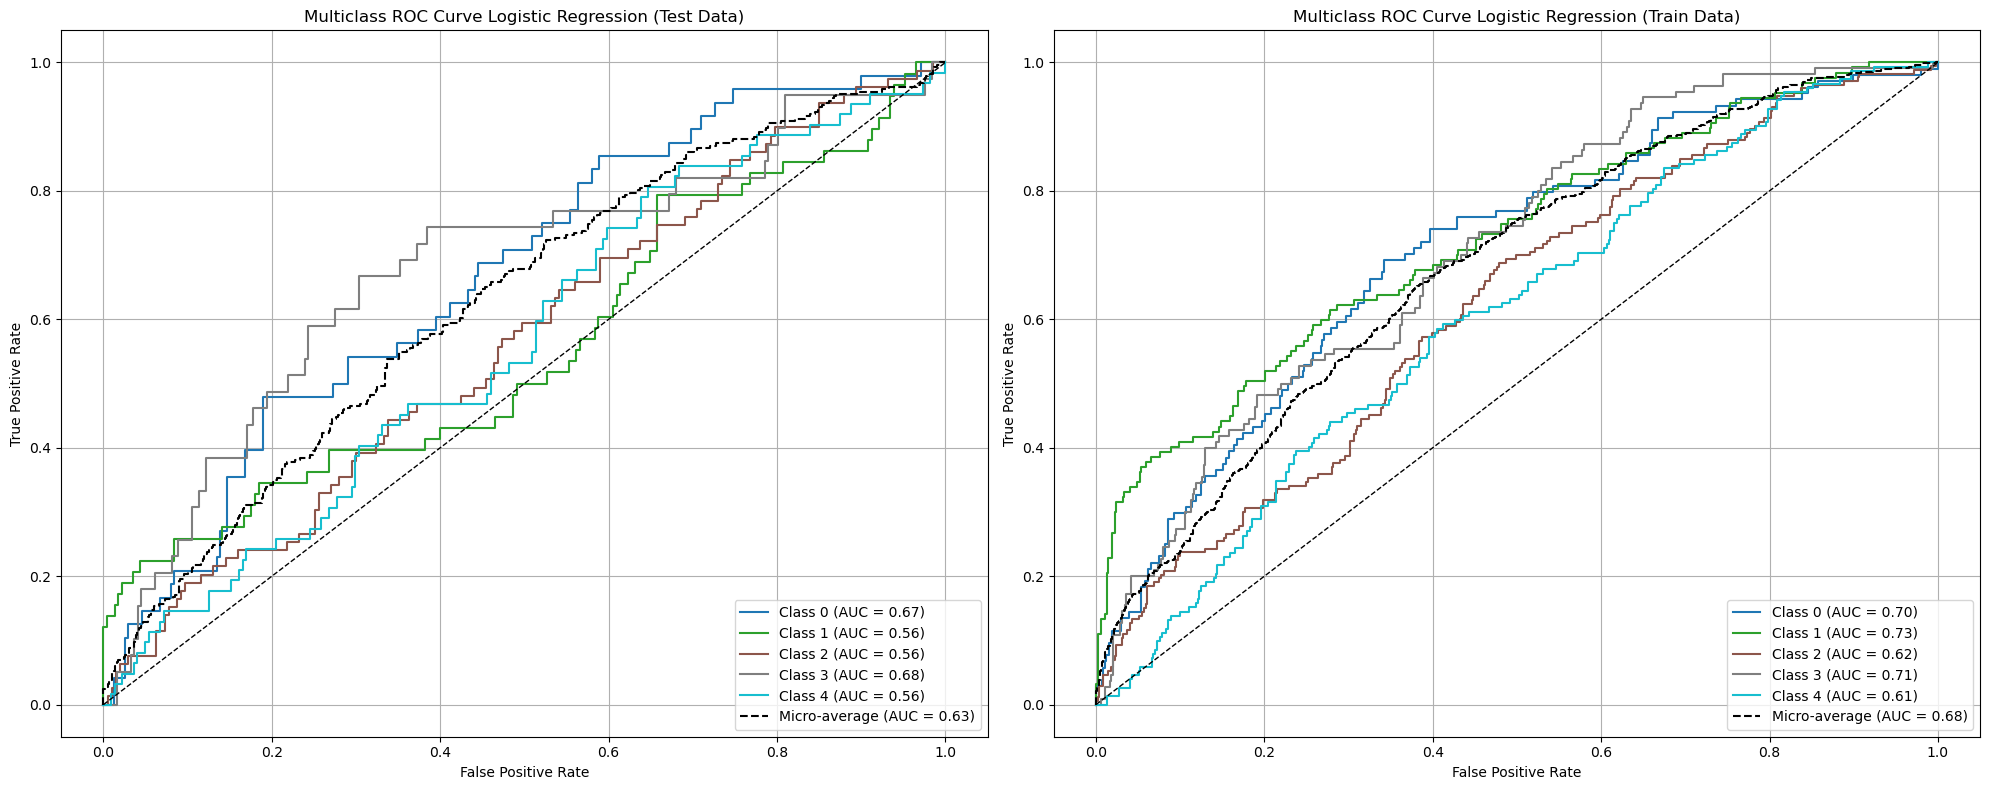

In [44]:
# Initialize subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

# First subplot: Test ROC Curve
fpr_test = {}
tpr_test = {}
roc_auc_test = {}

# Compute ROC curve and AUC for each class (test data)
for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_lr_prob[:, i])
    roc_auc_test[i] = roc_auc_score(y_test_bin[:, i], y_test_pred_lr_prob[:, i])

# Compute micro-average ROC curve and AUC (test data)
fpr_micro_test, tpr_micro_test, _ = roc_curve(y_test_bin.ravel(), y_test_pred_lr_prob.ravel())
roc_auc_micro_test = roc_auc_score(y_test_bin, y_test_pred_lr_prob, average="micro")

colors = plt.cm.get_cmap('tab10', n_classes)  # Colormap for distinct colors
for i in range(n_classes):
    axes[0].plot(fpr_test[i], tpr_test[i], label=f"Class {i} (AUC = {roc_auc_test[i]:.2f})", color=colors(i))

axes[0].plot(fpr_micro_test, tpr_micro_test, linestyle='--', color='black', label=f"Micro-average (AUC = {roc_auc_micro_test:.2f})")
axes[0].plot([0, 1], [0, 1], 'k--', lw=1)
axes[0].set_title("Multiclass ROC Curve Logistic Regression (Test Data)")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc="lower right")
axes[0].grid()

# Second subplot: Train ROC Curve
fpr_train = {}
tpr_train = {}
roc_auc_train = {}

# Compute ROC curve and AUC for each class (train data)
for i in range(n_classes):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_train_pred_lr_prob[:, i])
    roc_auc_train[i] = roc_auc_score(y_train_bin[:, i], y_train_pred_lr_prob[:, i])

# Compute micro-average ROC curve and AUC (train data)
fpr_micro_train, tpr_micro_train, _ = roc_curve(y_train_bin.ravel(), y_train_pred_lr_prob.ravel())
roc_auc_micro_train = roc_auc_score(y_train_bin, y_train_pred_lr_prob, average="micro")

for i in range(n_classes):
    axes[1].plot(fpr_train[i], tpr_train[i], label=f"Class {i} (AUC = {roc_auc_train[i]:.2f})", color=colors(i))

axes[1].plot(fpr_micro_train, tpr_micro_train, linestyle='--', color='black', label=f"Micro-average (AUC = {roc_auc_micro_train:.2f})")
axes[1].plot([0, 1], [0, 1], 'k--', lw=1)
axes[1].set_title("Multiclass ROC Curve Logistic Regression (Train Data)")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc="lower right")
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\mazen\AppData\Local\Temp\ipykernel_17048\2120590694.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)  # Colormap for distinct colors


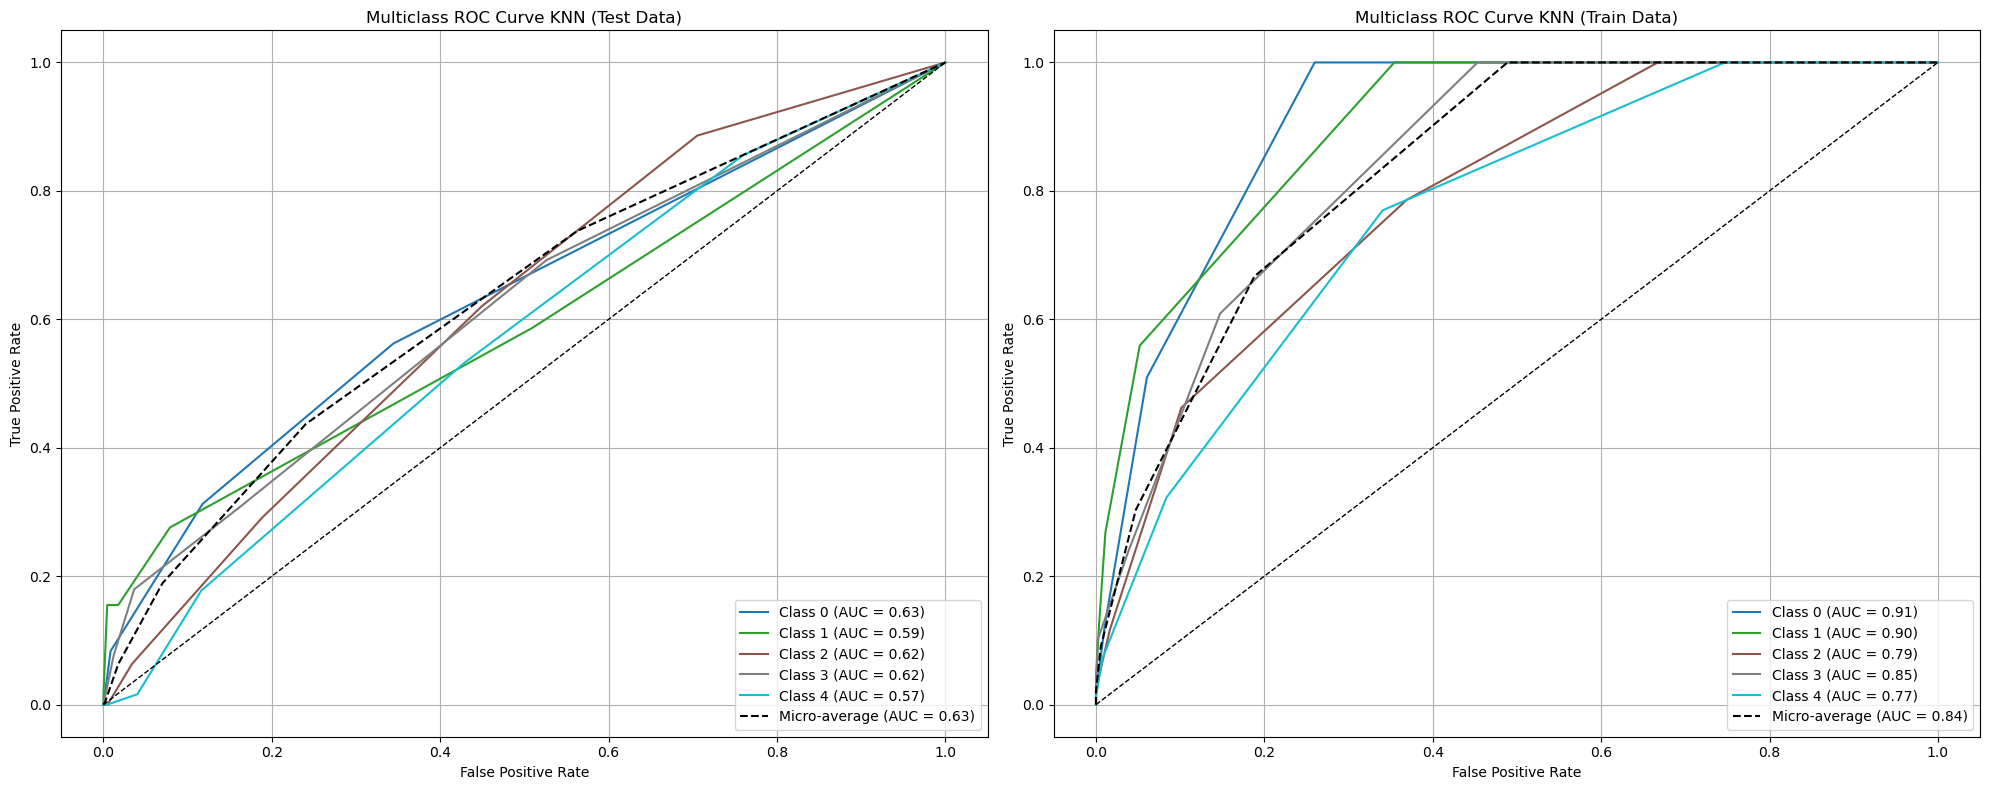

In [45]:
import matplotlib.pyplot as plt

# Initialize subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

# First subplot: Test ROC Curve
fpr_test = {}
tpr_test = {}
roc_auc_test = {}

# Compute ROC curve and AUC for each class (test data)
for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_test_pred_knn_prob[:, i])
    roc_auc_test[i] = roc_auc_score(y_test_bin[:, i], y_test_pred_knn_prob[:, i])

# Compute micro-average ROC curve and AUC (test data)
fpr_micro_test, tpr_micro_test, _ = roc_curve(y_test_bin.ravel(), y_test_pred_knn_prob.ravel())
roc_auc_micro_test = roc_auc_score(y_test_bin, y_test_pred_knn_prob, average="micro")

colors = plt.cm.get_cmap('tab10', n_classes)  # Colormap for distinct colors
for i in range(n_classes):
    axes[0].plot(fpr_test[i], tpr_test[i], label=f"Class {i} (AUC = {roc_auc_test[i]:.2f})", color=colors(i))

axes[0].plot(fpr_micro_test, tpr_micro_test, linestyle='--', color='black', label=f"Micro-average (AUC = {roc_auc_micro_test:.2f})")
axes[0].plot([0, 1], [0, 1], 'k--', lw=1)
axes[0].set_title("Multiclass ROC Curve KNN (Test Data)")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(loc="lower right")
axes[0].grid()

# Second subplot: Train ROC Curve
fpr_train = {}
tpr_train = {}
roc_auc_train = {}

# Compute ROC curve and AUC for each class (train data)
for i in range(n_classes):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_train_pred_knn_prob[:, i])
    roc_auc_train[i] = roc_auc_score(y_train_bin[:, i], y_train_pred_knn_prob[:, i])

# Compute micro-average ROC curve and AUC (train data)
fpr_micro_train, tpr_micro_train, _ = roc_curve(y_train_bin.ravel(), y_train_pred_knn_prob.ravel())
roc_auc_micro_train = roc_auc_score(y_train_bin, y_train_pred_knn_prob, average="micro")

for i in range(n_classes):
    axes[1].plot(fpr_train[i], tpr_train[i], label=f"Class {i} (AUC = {roc_auc_train[i]:.2f})", color=colors(i))

axes[1].plot(fpr_micro_train, tpr_micro_train, linestyle='--', color='black', label=f"Micro-average (AUC = {roc_auc_micro_train:.2f})")
axes[1].plot([0, 1], [0, 1], 'k--', lw=1)
axes[1].set_title("Multiclass ROC Curve KNN (Train Data)")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend(loc="lower right")
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

In [82]:
from sklearn.metrics import log_loss

def loss_curve(y_train, y_train_pred, y_test, y_test_pred, model_name):
    loss_train = log_loss(y_train, y_train_pred)
    loss_test = log_loss(y_test, y_test_pred)
    print(f"{model_name} Train Log Loss: {loss_train}")
    print(f"{model_name} Test Log Loss: {loss_test}")
loss_curve(y_train, y_train_pred_lr_prob, y_test, y_test_pred_lr_prob, model_name="Logistic Regression")

Logistic Regression Train Log Loss: 1.4869558149211097
Logistic Regression Test Log Loss: 1.5504039010213708


In [86]:
loss_curve(y_train, y_train_pred_knn_prob, y_test, y_test_pred_knn_prob, model_name="KNN")

KNN Train Log Loss: 0.9937528762900008
KNN Test Log Loss: 10.240998144909446
